# Random Walk

Suppose You start at step 0 of a high building.
you move around based on random events:
one step UP:   if you roll the dice and you got [1, 2]
one step DOWN: if got [3, 4, 5],
"special case"; you got [6]: you will move up x steps; detemined randomly by rolling the dice one time.
you can NOT go bellow step 0.
you have chance of "clumssiness" 0.001 one time over thousand of times

BET: you will reach the step 60 or higher at the end hit (100th rolling) of the random walk

In [43]:
import numpy as np

def generate_random_walk():
    random_walk = [0]
    for i in range(100):
        step = random_walk[-1]    
        dice = np.random.randint(1, 7)
        if dice in [1, 2]:
            step += 1
        elif dice in [3, 4, 5]:
            step = max(0, step-1)
        else:
            step += np.random.randint(1, 7)
        clumsiness_chance = np.random.rand()
        if clumsiness_chance == 0.001:
            step = 0
        random_walk.append(step)
    return random_walk
    
random_walk = generate_random_walk()
print(np.array(random_walk))

[ 0  0  6  8  7 12 11 10  9 14 13 12 11 10 13 14 13 14 15 14 15 16 17 23
 22 21 22 23 26 27 28 27 26 32 31 30 31 36 35 37 36 37 36 35 37 40 39 38
 39 45 46 47 46 45 46 47 48 49 50 51 50 51 52 53 52 51 52 53 55 56 55 56
 55 56 55 54 53 52 53 52 53 54 55 56 57 58 57 58 57 56 57 58 59 65 64 63
 62 61 62 61 60]


In [44]:
all_random_walks = []
for i in range(500):         # Run Experiements 500 times!
    rw = generate_random_walk()
    all_random_walks.append(np.array(rw))
print(np.array(all_random_walks))

[[ 0  0  0 ... 42 43 42]
 [ 0  0  0 ... 44 45 44]
 [ 0  0  1 ... 53 54 55]
 ...
 [ 0  1  6 ... 70 69 68]
 [ 0  0  1 ... 52 51 52]
 [ 0  5  9 ... 66 65 66]]


In [45]:
# Prepare Visualization
# if you want to visualize all random walks from a 2d numpy array
# the set up of one random walk should be in a column not a row
np_all_walks   = np.array(all_random_walks)
np_all_walks_t = np.transpose(np_all_walks)
print(np_all_walks_t)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  5]
 [ 0  0  1 ...  6  1  9]
 ...
 [42 44 53 ... 70 52 66]
 [43 45 54 ... 69 51 65]
 [42 44 55 ... 68 52 66]]


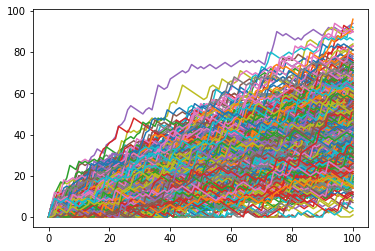

In [46]:
import matplotlib.pyplot as plt
plt.plot(np_all_walks_t)
plt.show()

In [47]:
# to trust about the bet: at final walk you end up 60 or higher steps
ends = np_all_walks_t[-1, :]
print(ends)

[42 44 55 71 67 10 64 47 48 26 41 27 31 50 59 75 30 21 40 40 37 36 47 45
 41 43 61 45 61 44 43 36 16 28 64 62 38 39 45 44 70 43 54 39 20 75 45 39
 62 43 70 65 36 47 31 26 62 26 60 92 66 56 59 53 55 46 60 32 34 47 53 41
 57 14 41 47 49 33 49 41 24 65 25 49 45 35 51 59 46 38 36 53 48 64 37 36
 42 78 58 71 71 45 17 11 57 29 48 25 18 48 28 29 46 59 65 56 44 38 32 47
 39 51 27 50 53 48 37 59 29 29 29 40 10 55 94 76 30 53 53 43 36 41 58 41
 43 20 45 69  1 69 50 26 52 52 73 20 40 33 58 39 53 24 59 19 45 45 50 32
 32 43 41 41 55 55 58 35 25 51 91 36 71 53 26 65 64 27 60 53 26 50 32 16
 61 19 10 34 72 32 43 24 31 72 55 90 29 37 39 59 32 51 57 50 15 29 58 43
 50 54 81 32 72 54 65 81 63 37 35 58 35 17 31 41 36 40 28 39 42 54 46 33
 43 33 42 83 58 28 48 24 36 45 77 45 31 42 79 22 29 31 49 60 51 73 31 40
 53 19 23 73 55 38 34 40 61 18 37 69 55 41 32 52 20 59 39 60 61 39 79 18
 39 49 47 56 35 29 60 12 29 23 39 86 40 32 19 24 73 37 26 32  3 68 61 49
 50 75 42 42 71 65 47 17 50 35 17 32 40 81 58 35 33

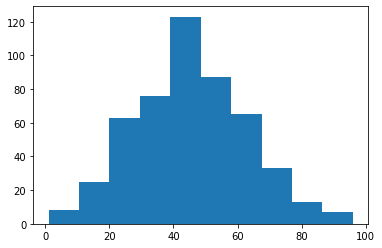

In [48]:
# plot a distribution of thoses hits
plt.hist(ends)
plt.show()

In [49]:
# propability of getting 60 or higher at the random_walk_end 
space       = len(ends)
occurancies = len(ends[ends>=60])
print(occurancies/space)


0.194
